## **Traditional Maltese Food and Snacks Classifier**

# **Environment Setup**

**Cloning and Building Darknet**

In [1]:
# Clone Darknet Repository
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13621, done.
remote: Total 13621 (delta 0), reused 0 (delta 0), pack-reused 13621
Receiving objects: 100% (13621/13621), 12.23 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (9290/9290), done.


In [2]:
# Change Makefile To Have GPU and OPENCV Enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# Verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# Build Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
# Define imShow Functions to Display Images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

**Mount Google Drive**

In [6]:
# Google Drive Import
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
# Creates a Symbolic Link for path /content/gdrive/My\ Drive/ to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   Colab_Notebooks  'Entrepreneur '


In [8]:
# Drive Folder
!ls /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/

backup			      generate_test.py	 obj.names  yolov3_custom.cfg
darknet53.conv.74	      generate_train.py  obj.zip
FoodClassifierNoteBook.ipynb  obj.data		 test.zip


In [0]:
# Copy Dataset .zip File Into Directory /content/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/obj.zip /content/

# Copy test_images.zip File Into Directory /content/darknet/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/test.zip /content/

In [10]:
# Verify Copied File
%ls

darknet/  gdrive/  obj.zip  sample_data/  test.zip


In [0]:
# Unzip Dataset and Test_Images
!unzip obj.zip -d /content/darknet/data/
!unzip test.zip -d /content/darknet/data/

# **Configure Files**

In [0]:
# Copy Custom .cfg File From Drive To /cfg/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/yolov3_custom.cfg /content/darknet/cfg

In [0]:
# Copy .data/.names Files From Drive to /data/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/obj.names /content/darknet/data
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/obj.data  /content/darknet/data

**Import Convolutional Layers**

In [0]:
# Copy Convolutional Layers from Drive to /darknet/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/darknet53.conv.74 /content/darknet/

**Setup train.txt File**

In [0]:
# Copy Python Script From Drive To /darknet/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/generate_train.py /content/darknet/
!cp /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/generate_test.py /content/darknet/

In [16]:
# Change Directory
%cd /content/darknet/
%ls

/content/darknet
3rdparty/          DarknetConfig.cmake.in  LICENSE
backup/            darknet.py              Makefile
build/             darknet_video.py        net_cam_v3.sh*
build.ps1*         data/                   obj/
build.sh*          generate_test.py        README.md
cfg/               generate_train.py       results/
cmake/             image_yolov2.sh*        scripts/
CMakeLists.txt     image_yolov3.sh*        src/
darknet*           include/                video_v2.sh*
darknet53.conv.74  json_mjpeg_streams.sh*  video_yolov3.sh*


In [0]:
# Execute Script
!python generate_train.py
!python generate_test.py

File 'train.txt' Should Be Found in Directory /content/darknet/data/
File 'test.txt' Should Be Found in Directory /content/darknet/



In [18]:
# Confirm
!ls /content/darknet/data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


# **Model Training**

In [19]:
# Change Directory
%cd /content/darknet
%ls

/content/darknet
3rdparty/               darknet.py              net_cam_v3.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build.ps1*              generate_test.py        results/
build.sh*               generate_train.py       scripts/
cfg/                    image_yolov2.sh*        src/
cmake/                  image_yolov3.sh*        test.txt
CMakeLists.txt          include/                video_v2.sh*
darknet*                json_mjpeg_streams.sh*  video_yolov3.sh*
darknet53.conv.74       LICENSE
DarknetConfig.cmake.in  Makefile


Copy the Following Script into Console To Keep Runtime Alive:

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```



**Training**

In [0]:
 # Train Model
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [0]:
# Continue Training From Last Weights if Runtime Srashes
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/backup/yolov3_custom_last.weights -dont_show

**Test**
<br>
Upload Folder 'test_images' Populated With Test Images

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

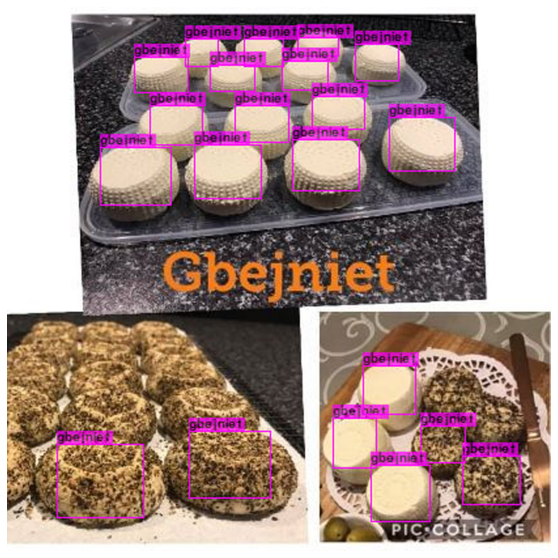

In [20]:
# Test Model
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/backup/yolov3_custom_final.weights 'data/test/41.jpg'
imShow('predictions.jpg')

In [21]:
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/YOLOv3FoodClassifier/backup/yolov3_custom_final.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 